In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.wages_visual import WagesVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(
    bucket_name="fbref_db", blob_name="La-Liga-wages.csv"
)

[03/07/24 18:46:28] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=83941;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=828363;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=868847;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=931523;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season
0,1,Lionel Messi,ARG,FW,Barcelona,30,761923,39620000,Unverified estimation,2017-2018
1,2,Cristiano Ronaldo,POR,FW,Real Madrid,32,670192,34850000,Unverified estimation,2017-2018
2,3,Samuel Umtiti,FRA,DF,Barcelona,23,615385,32000000,Unverified estimation,2017-2018
3,4,Gerard Piqué,ESP,DF,Barcelona,30,546154,28400000,Unverified estimation,2017-2018
4,5,Gareth Bale,WAL,"FW,MF",Real Madrid,28,532308,27680000,Unverified estimation,2017-2018


In [4]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.0,564,1,564,265.5,266.04,153.94,0,0.00
age,int64,0,0.0,26,16,41,26.0,26.36,4.34,1,0.03
weekly_wages_euros,int64,0,0.0,891,62,1365385,18462.0,47415.96,90675.09,443,11.94
annual_wages_euros,int64,0,0.0,891,3200,71000000,960000.0,2465629.57,4715104.33,443,11.94


In [5]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_co

In [6]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season,general_pos,age_range,country,continent
0,1,Lionel Messi,ARG,FW,Barcelona,30,761923,39620000,Unverified estimation,2017-2018,Forward,30-34,Argentina,South America
1,2,Cristiano Ronaldo,POR,FW,Real Madrid,32,670192,34850000,Unverified estimation,2017-2018,Forward,30-34,Portugal,Europe
2,3,Samuel Umtiti,FRA,DF,Barcelona,23,615385,32000000,Unverified estimation,2017-2018,Defender,20-24,France,Europe
3,4,Gerard Piqué,ESP,DF,Barcelona,30,546154,28400000,Unverified estimation,2017-2018,Defender,30-34,Spain,Europe
4,5,Gareth Bale,WAL,"FW,MF",Real Madrid,28,532308,27680000,Unverified estimation,2017-2018,Forward,25-29,Wales,Europe


In [7]:
stat_plots = StatisticPlots(df)

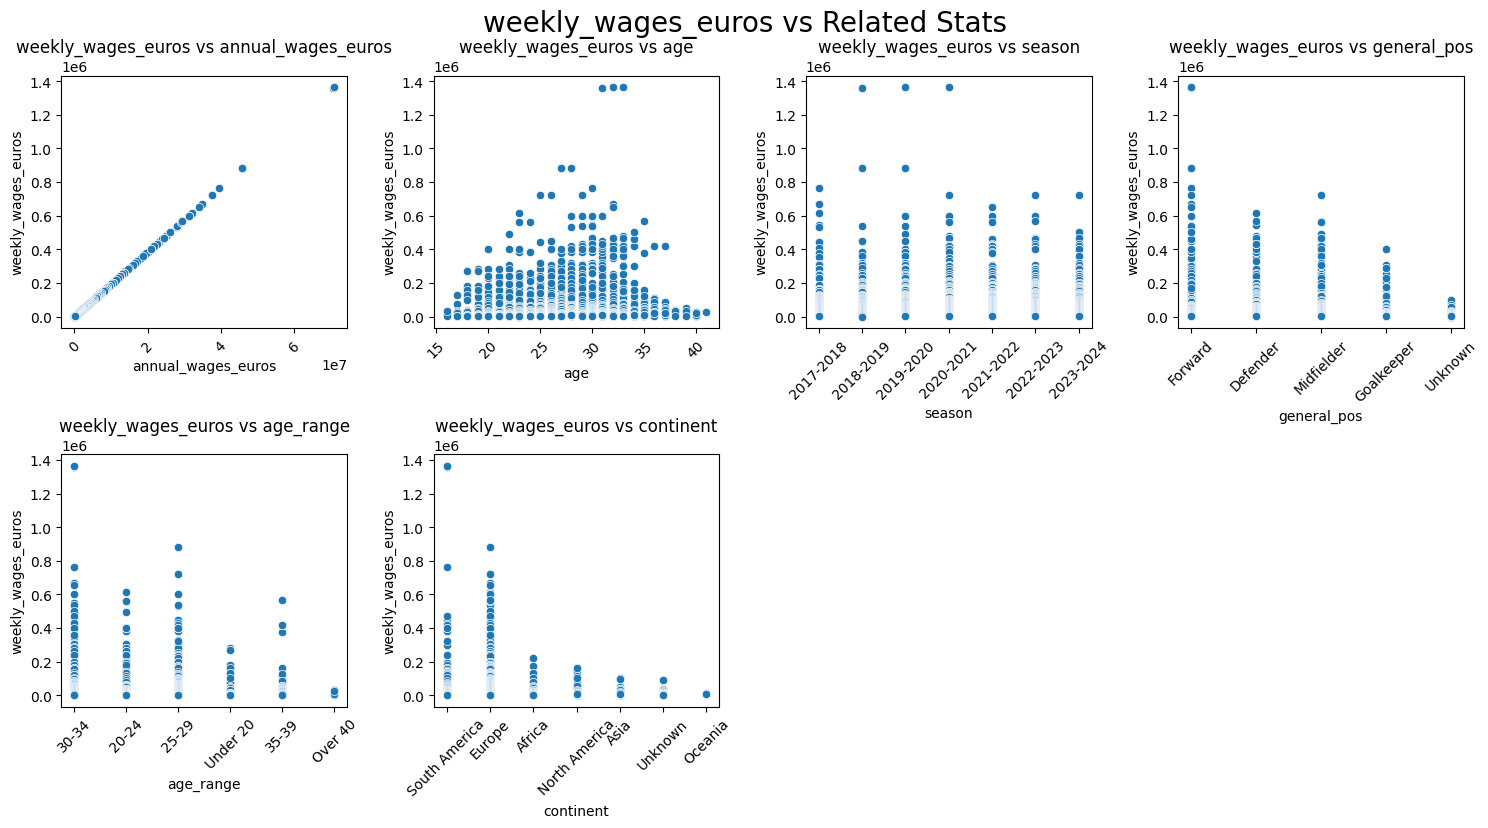

In [8]:
stat_plots.relationships(
    y="weekly_wages_euros",
    X=["annual_wages_euros", "age", "season", "general_pos", "age_range", "continent"],
)

In [9]:
wage_plots = WagesVisuals(df)

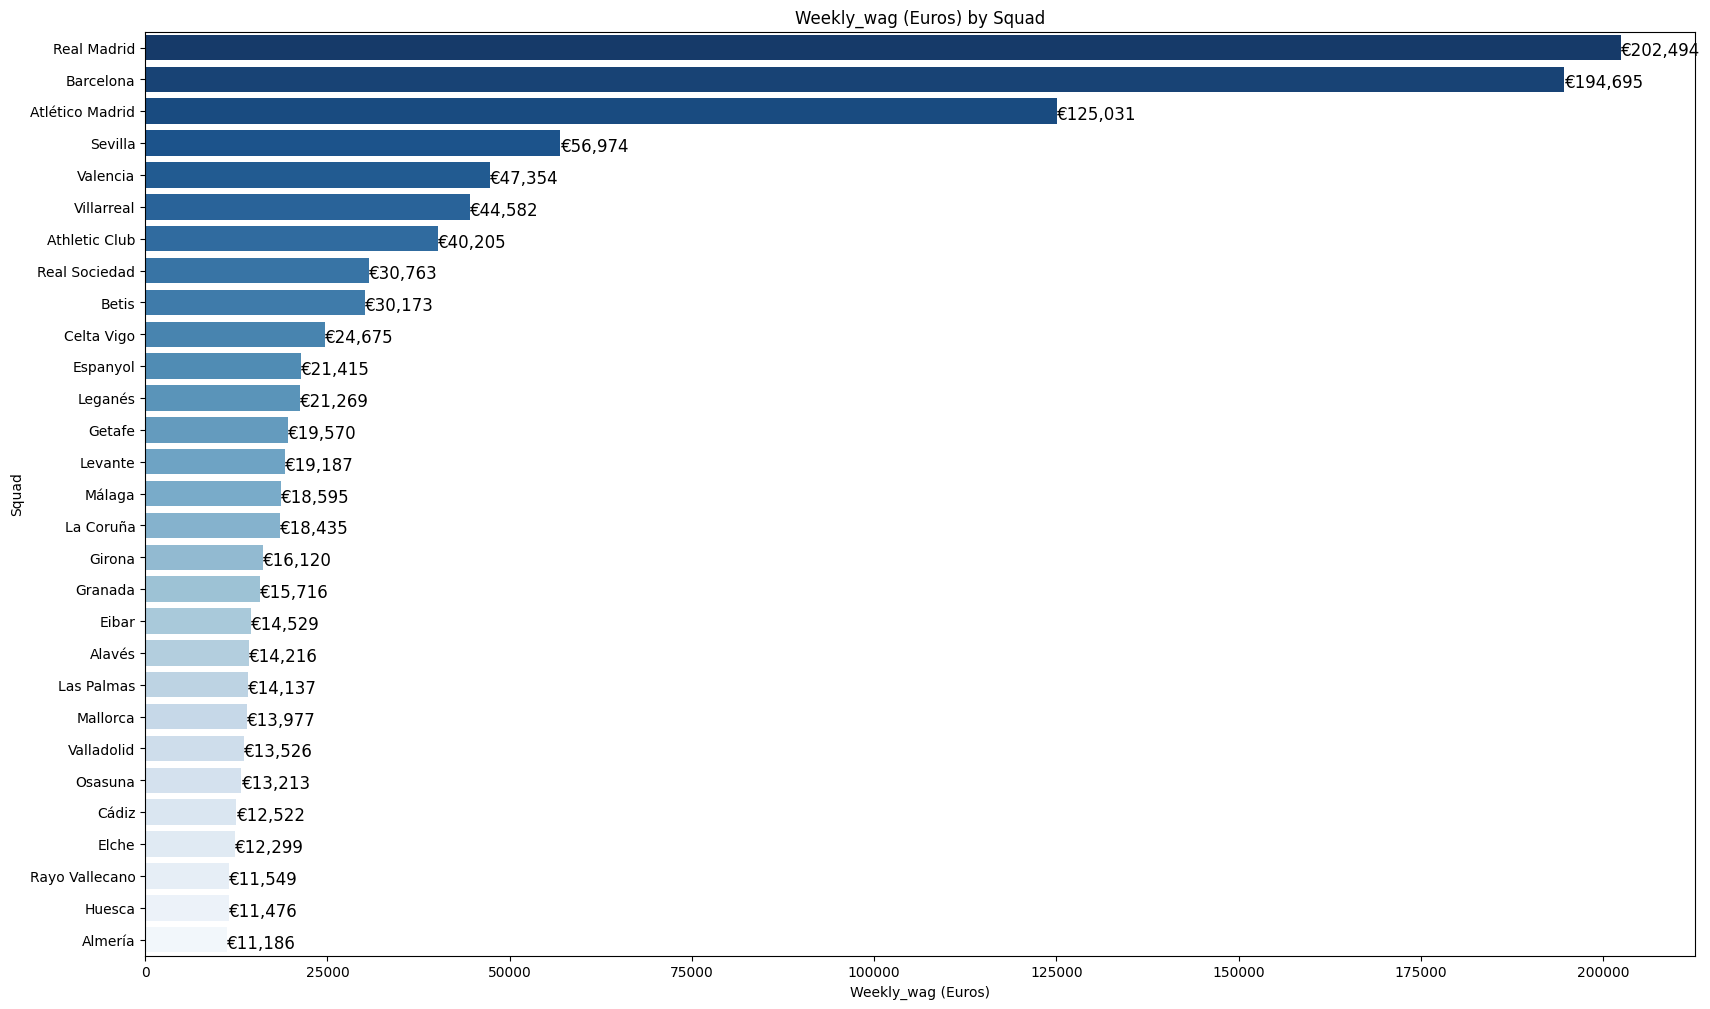

In [10]:
wage_plots.total_wage_avgs('squad')

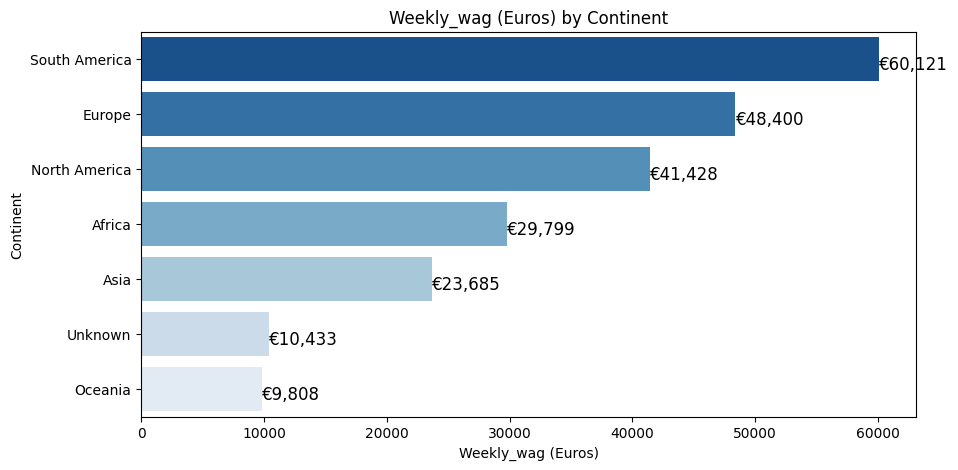

In [11]:
wage_plots.total_wage_avgs('continent', figsize=(10, 5))

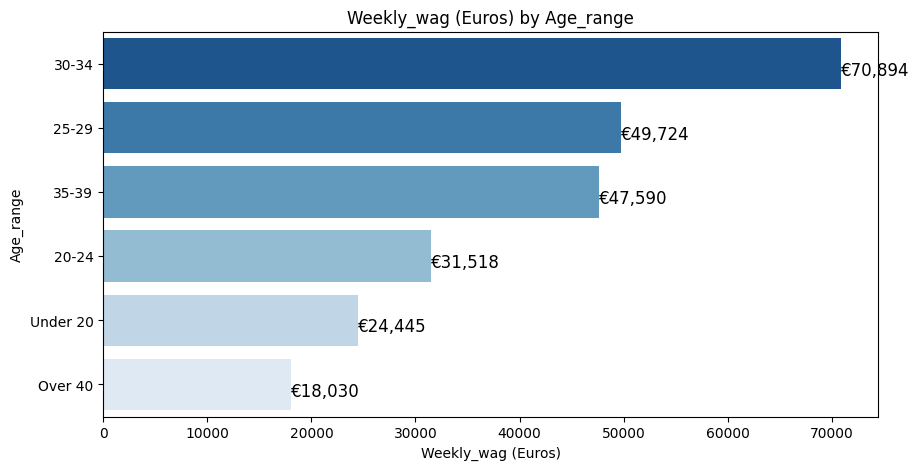

In [12]:
wage_plots.total_wage_avgs('age_range', figsize=(10, 5))

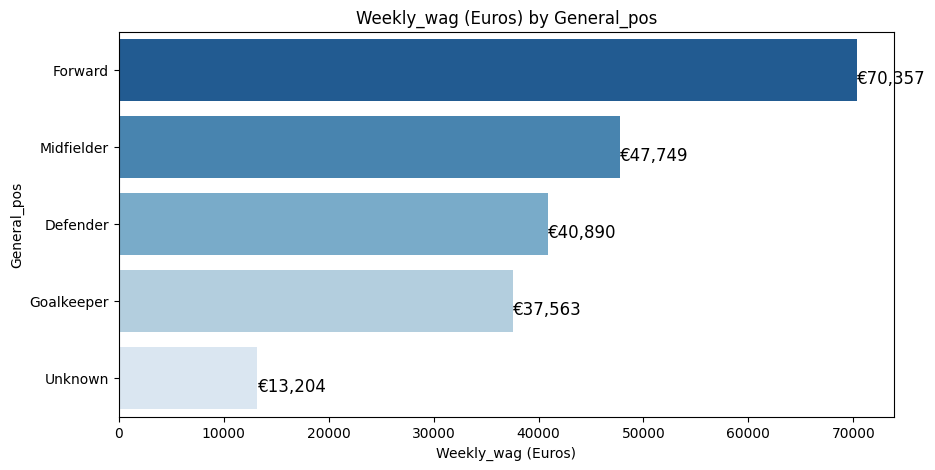

In [13]:
wage_plots.total_wage_avgs('general_pos', figsize=(10, 5))

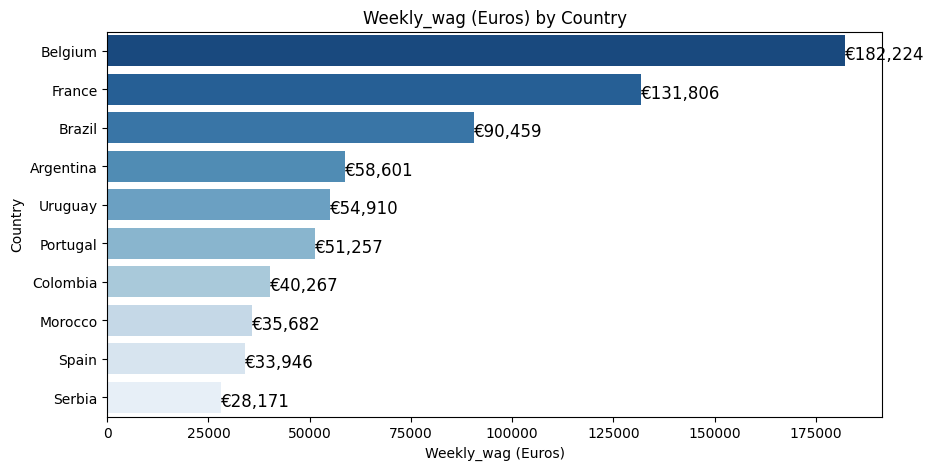

In [14]:
wage_plots.total_wage_avgs('country', figsize=(10, 5))

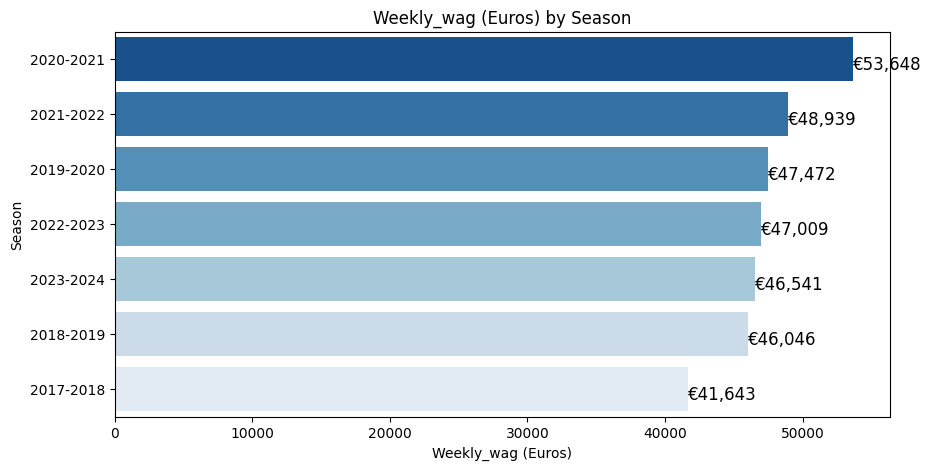

In [15]:
wage_plots.total_wage_avgs('season', figsize=(10, 5))

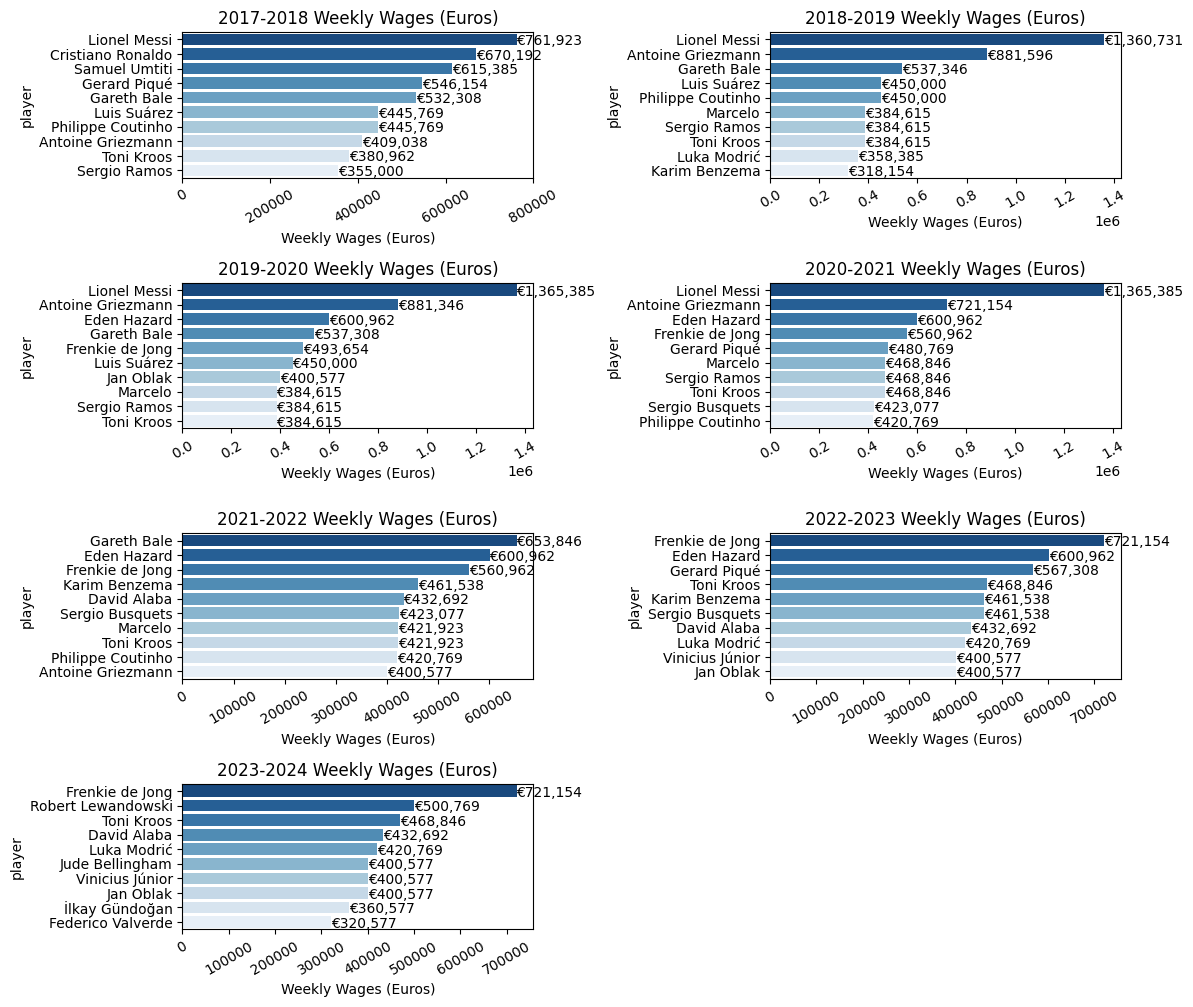

In [16]:
wage_plots.top_earners()

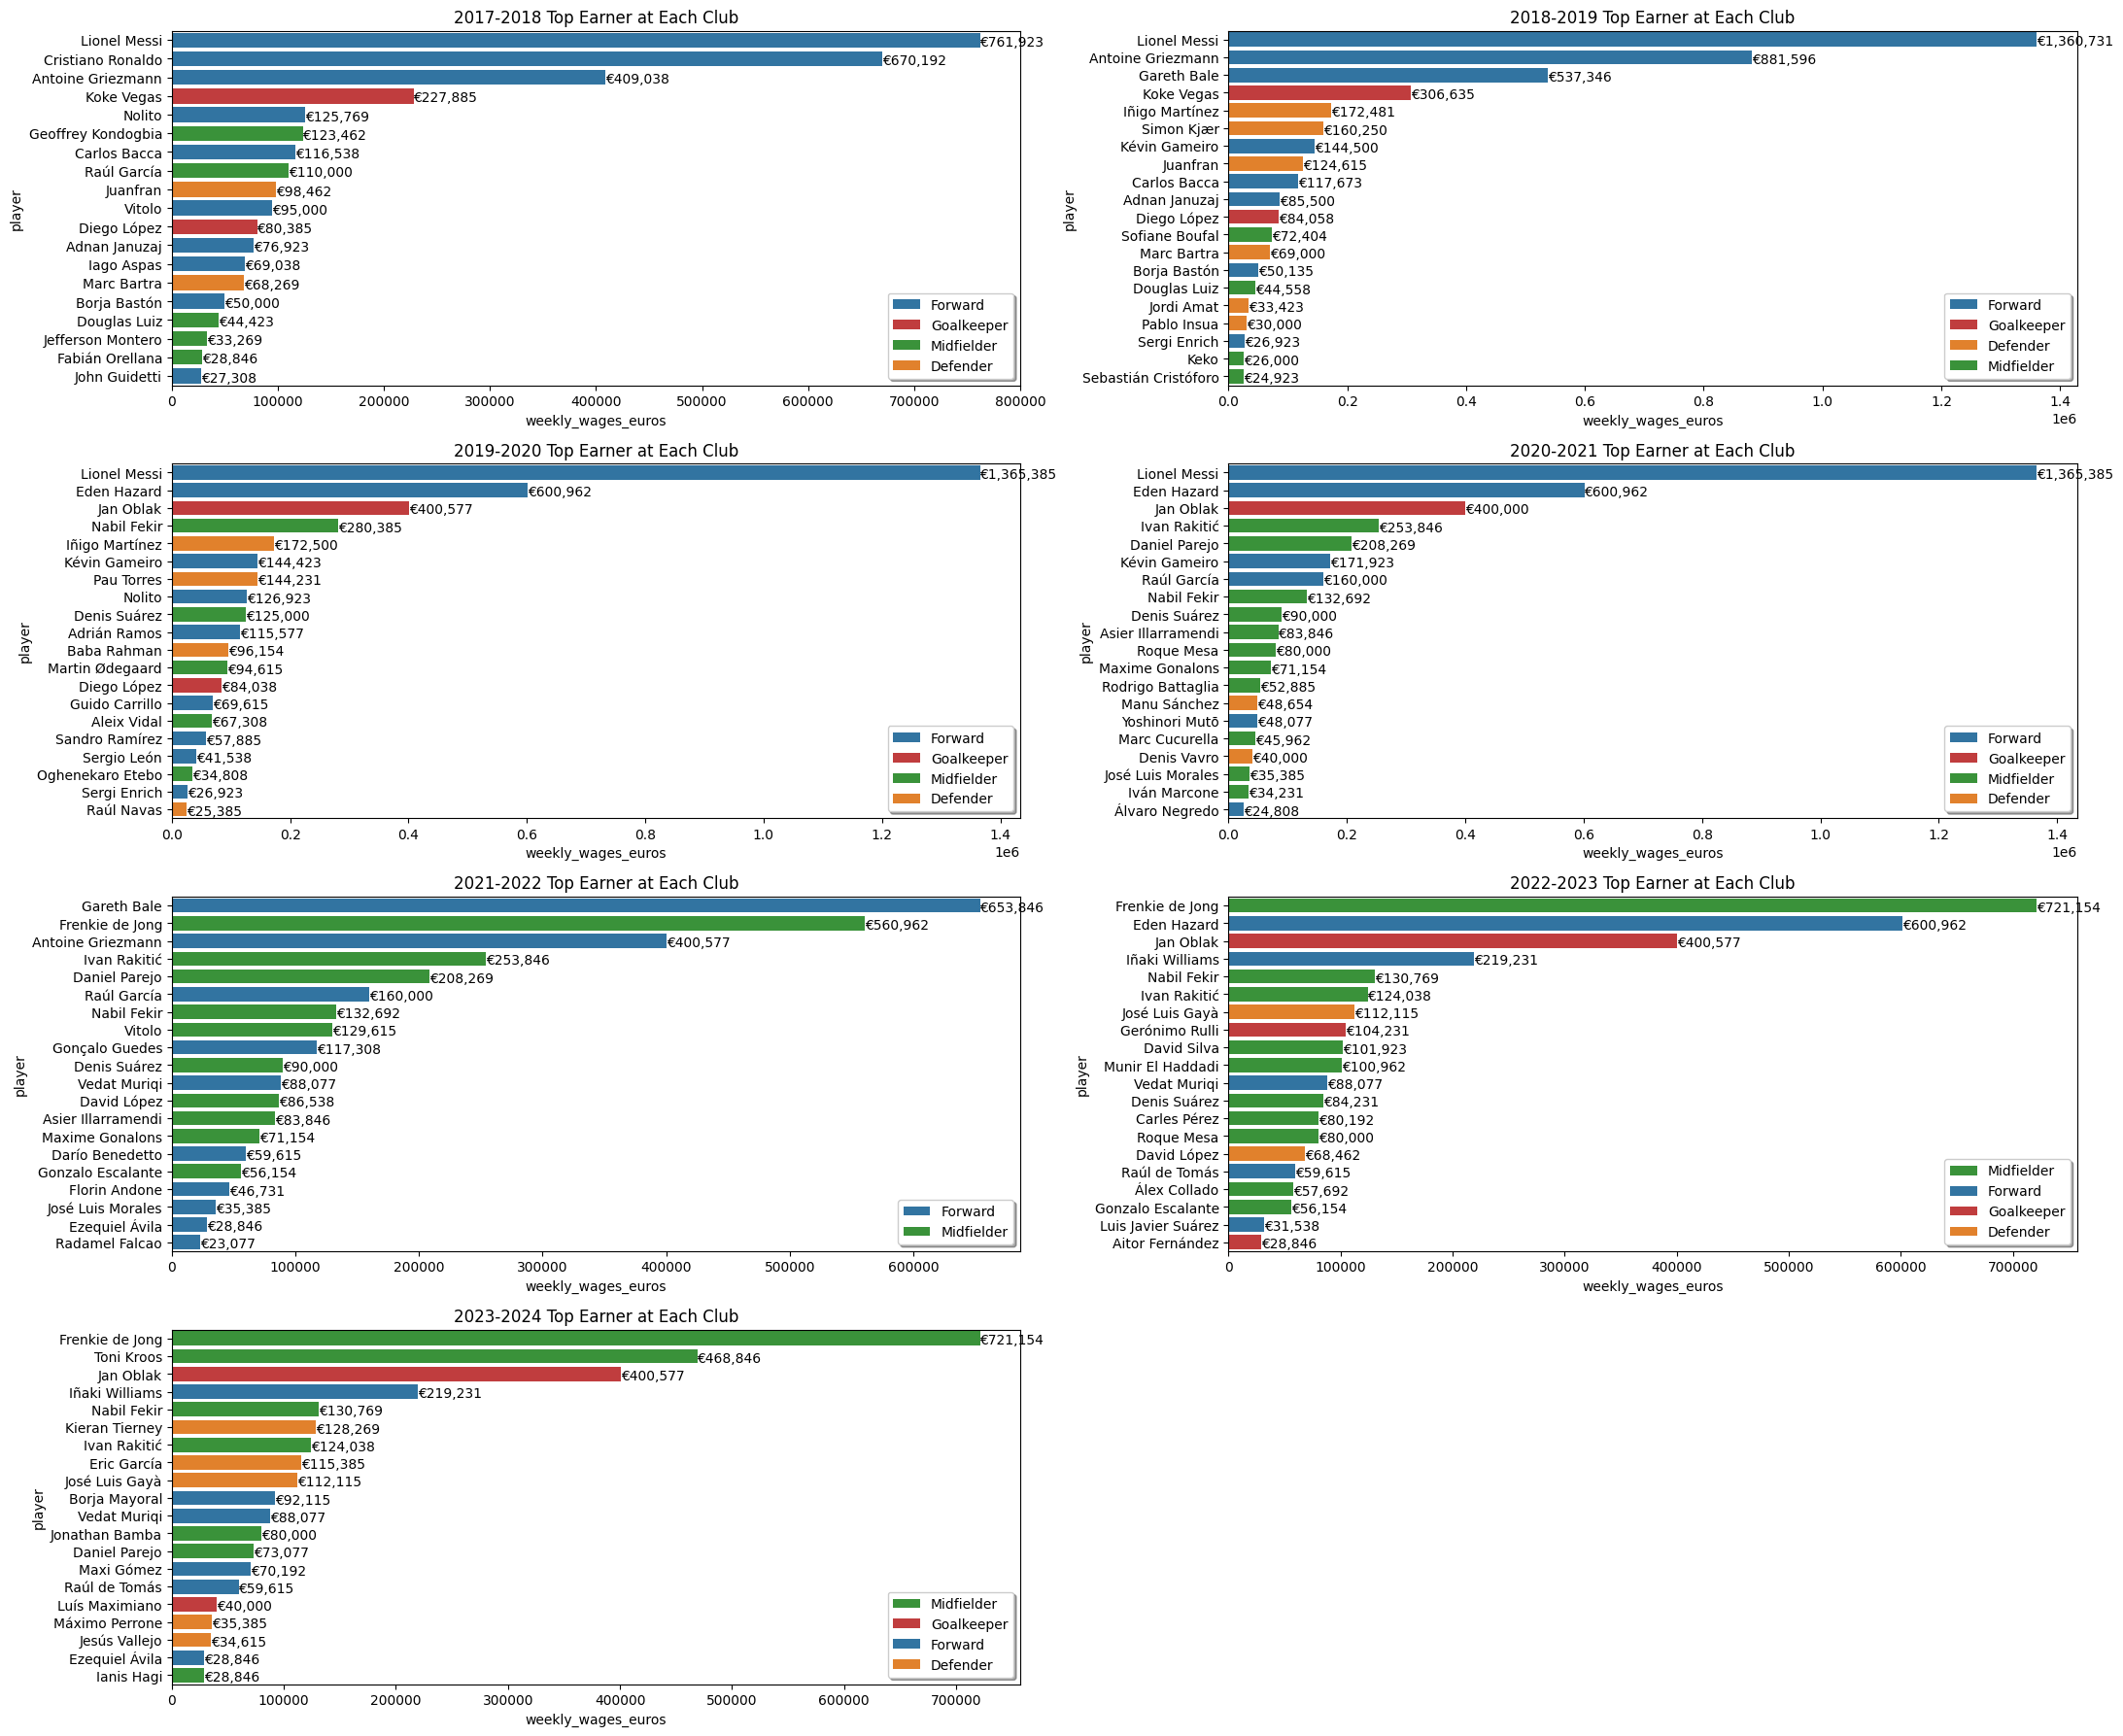

In [17]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='player')

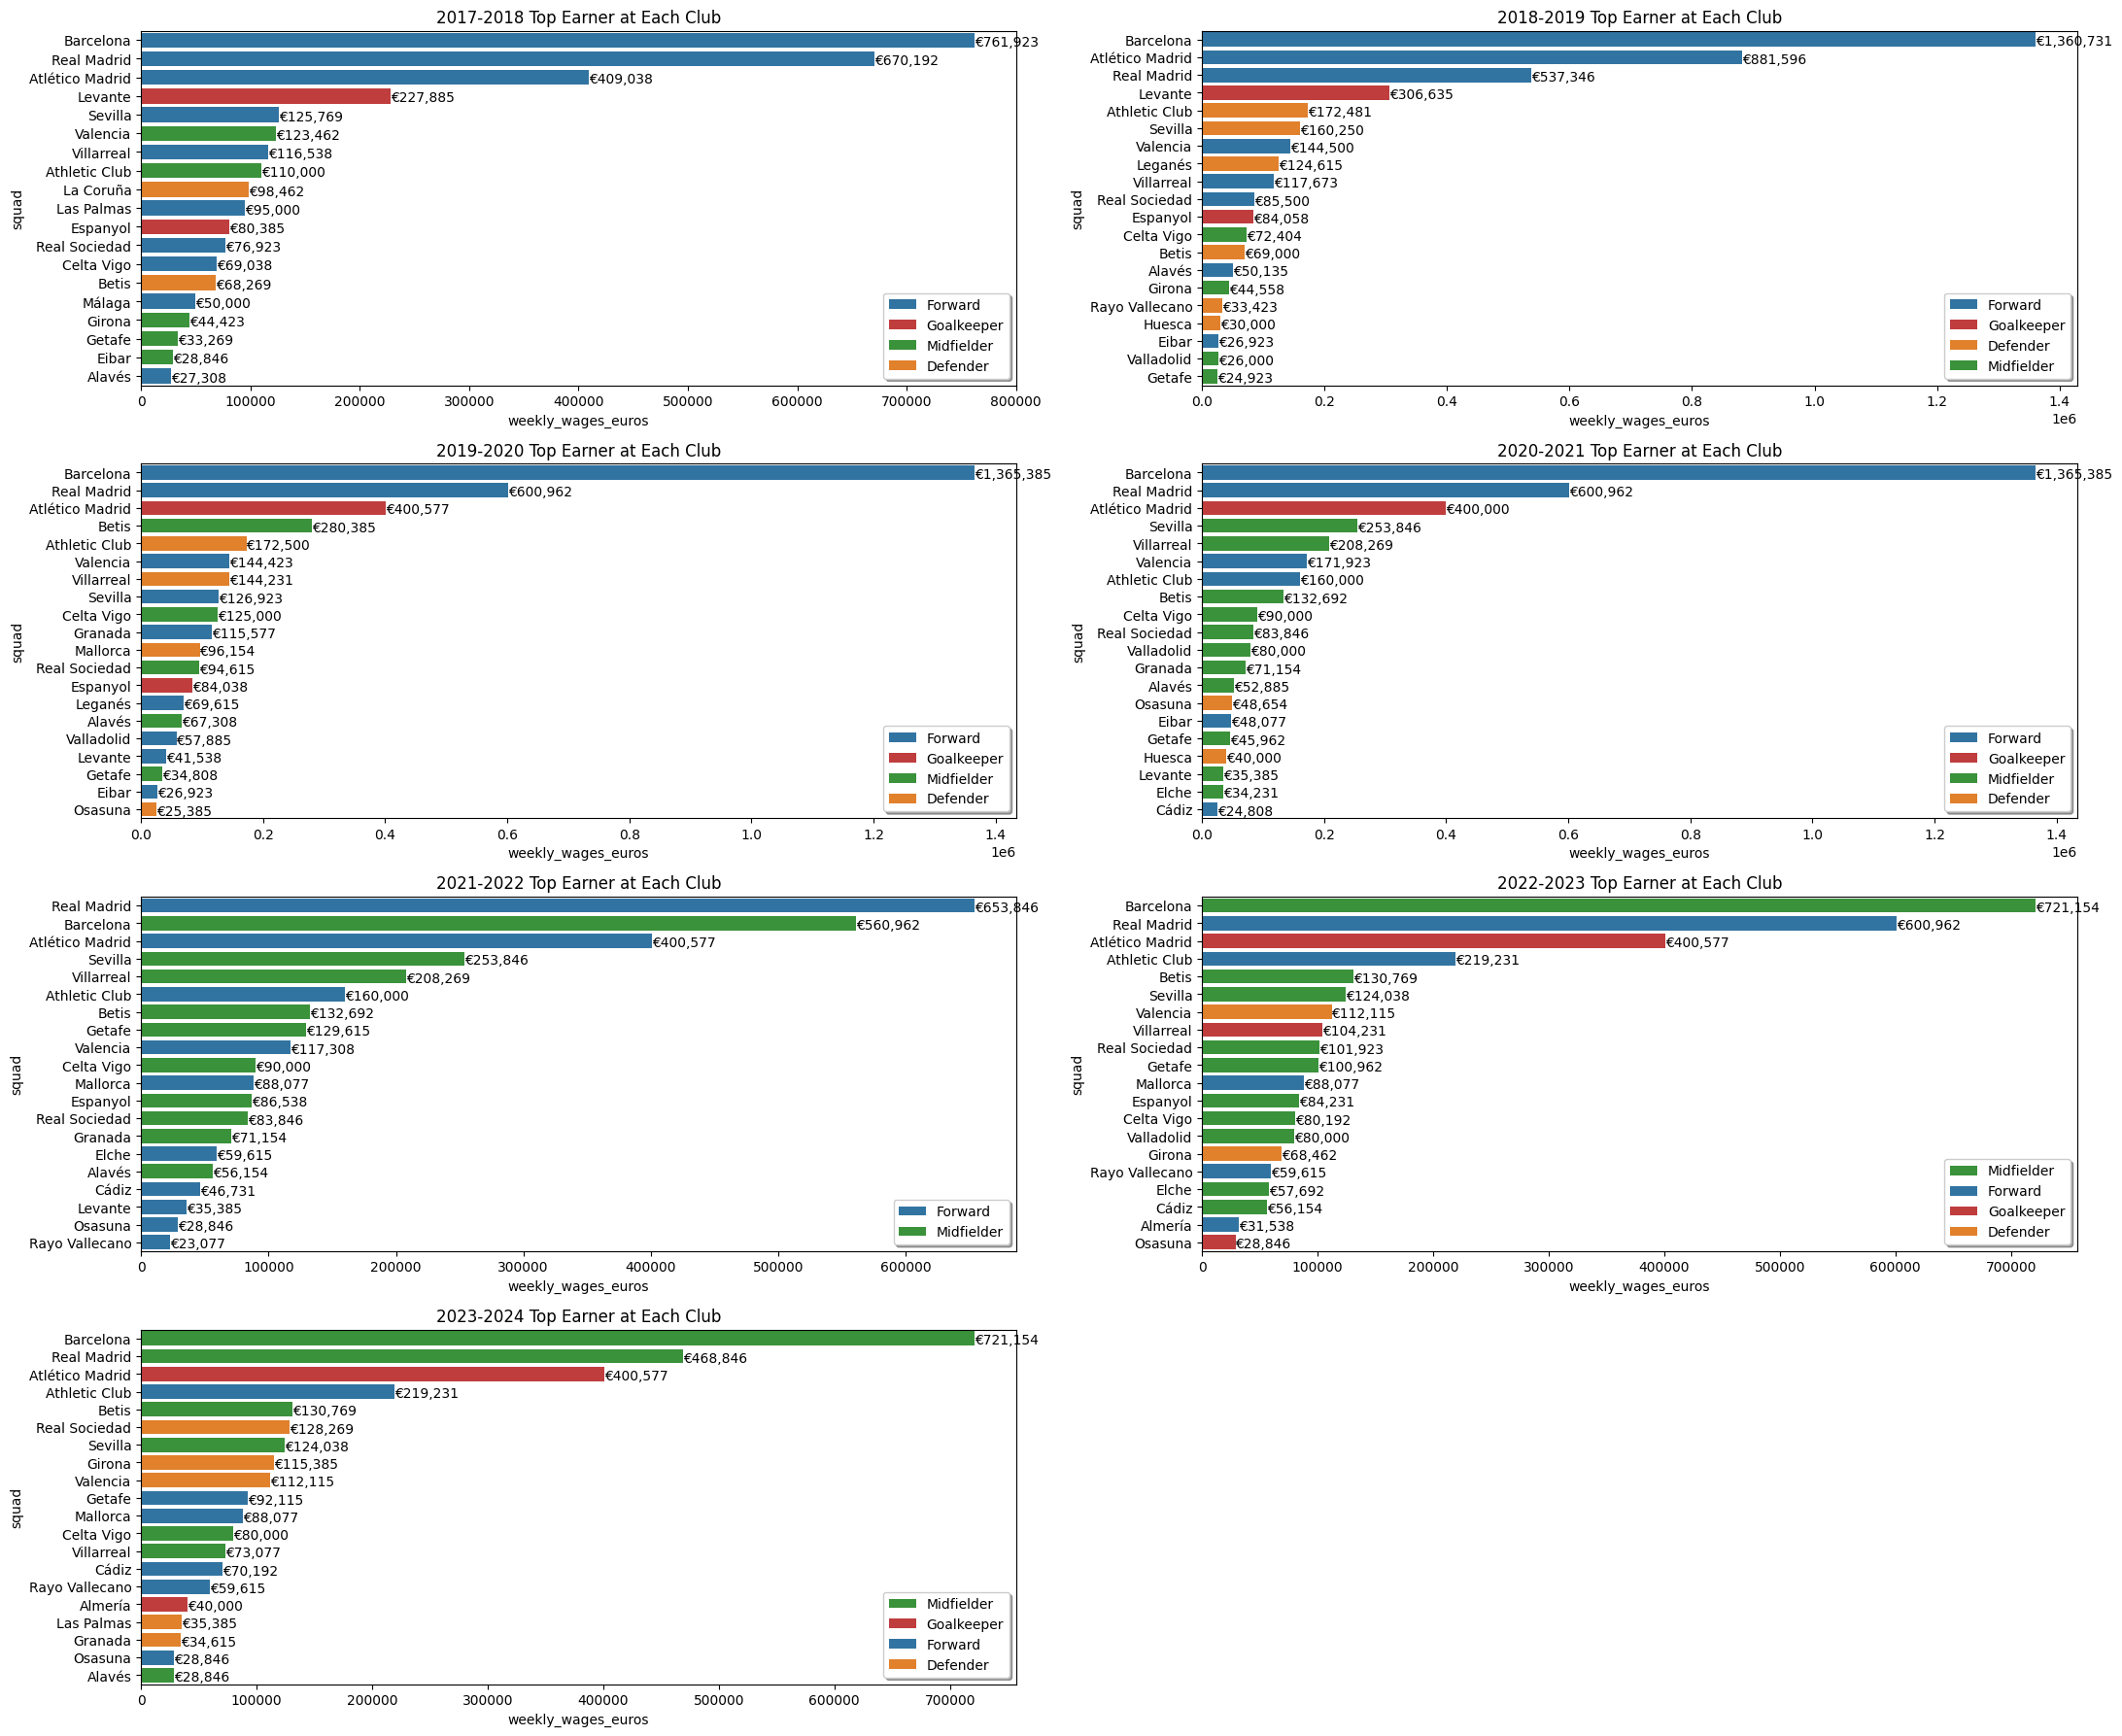

In [18]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='squad')

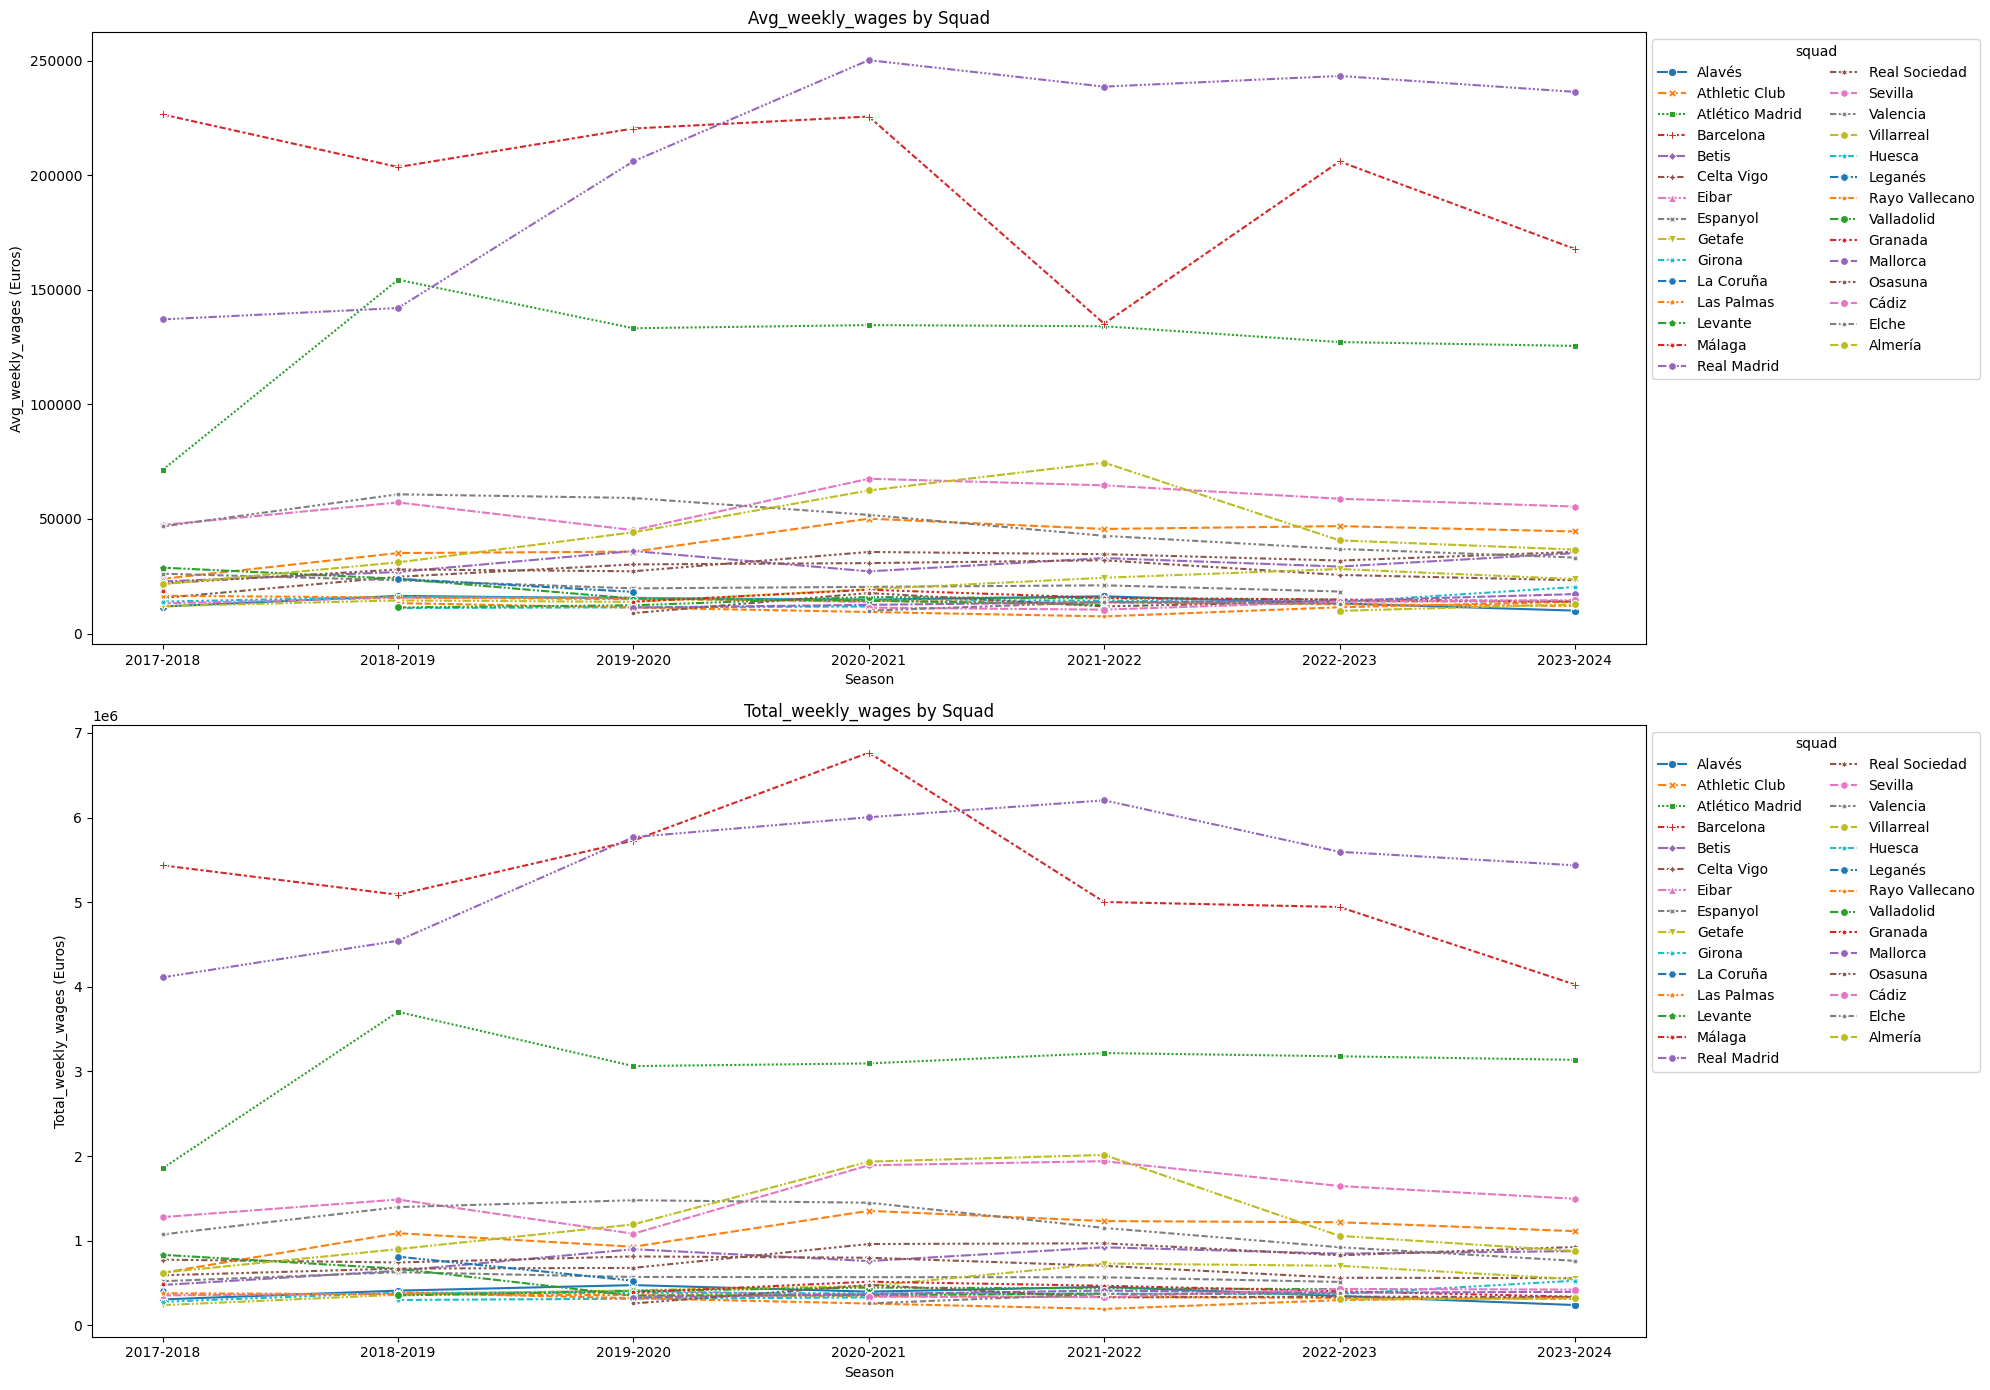

In [19]:
wage_plots.time_series('squad', figsize=(20,14))

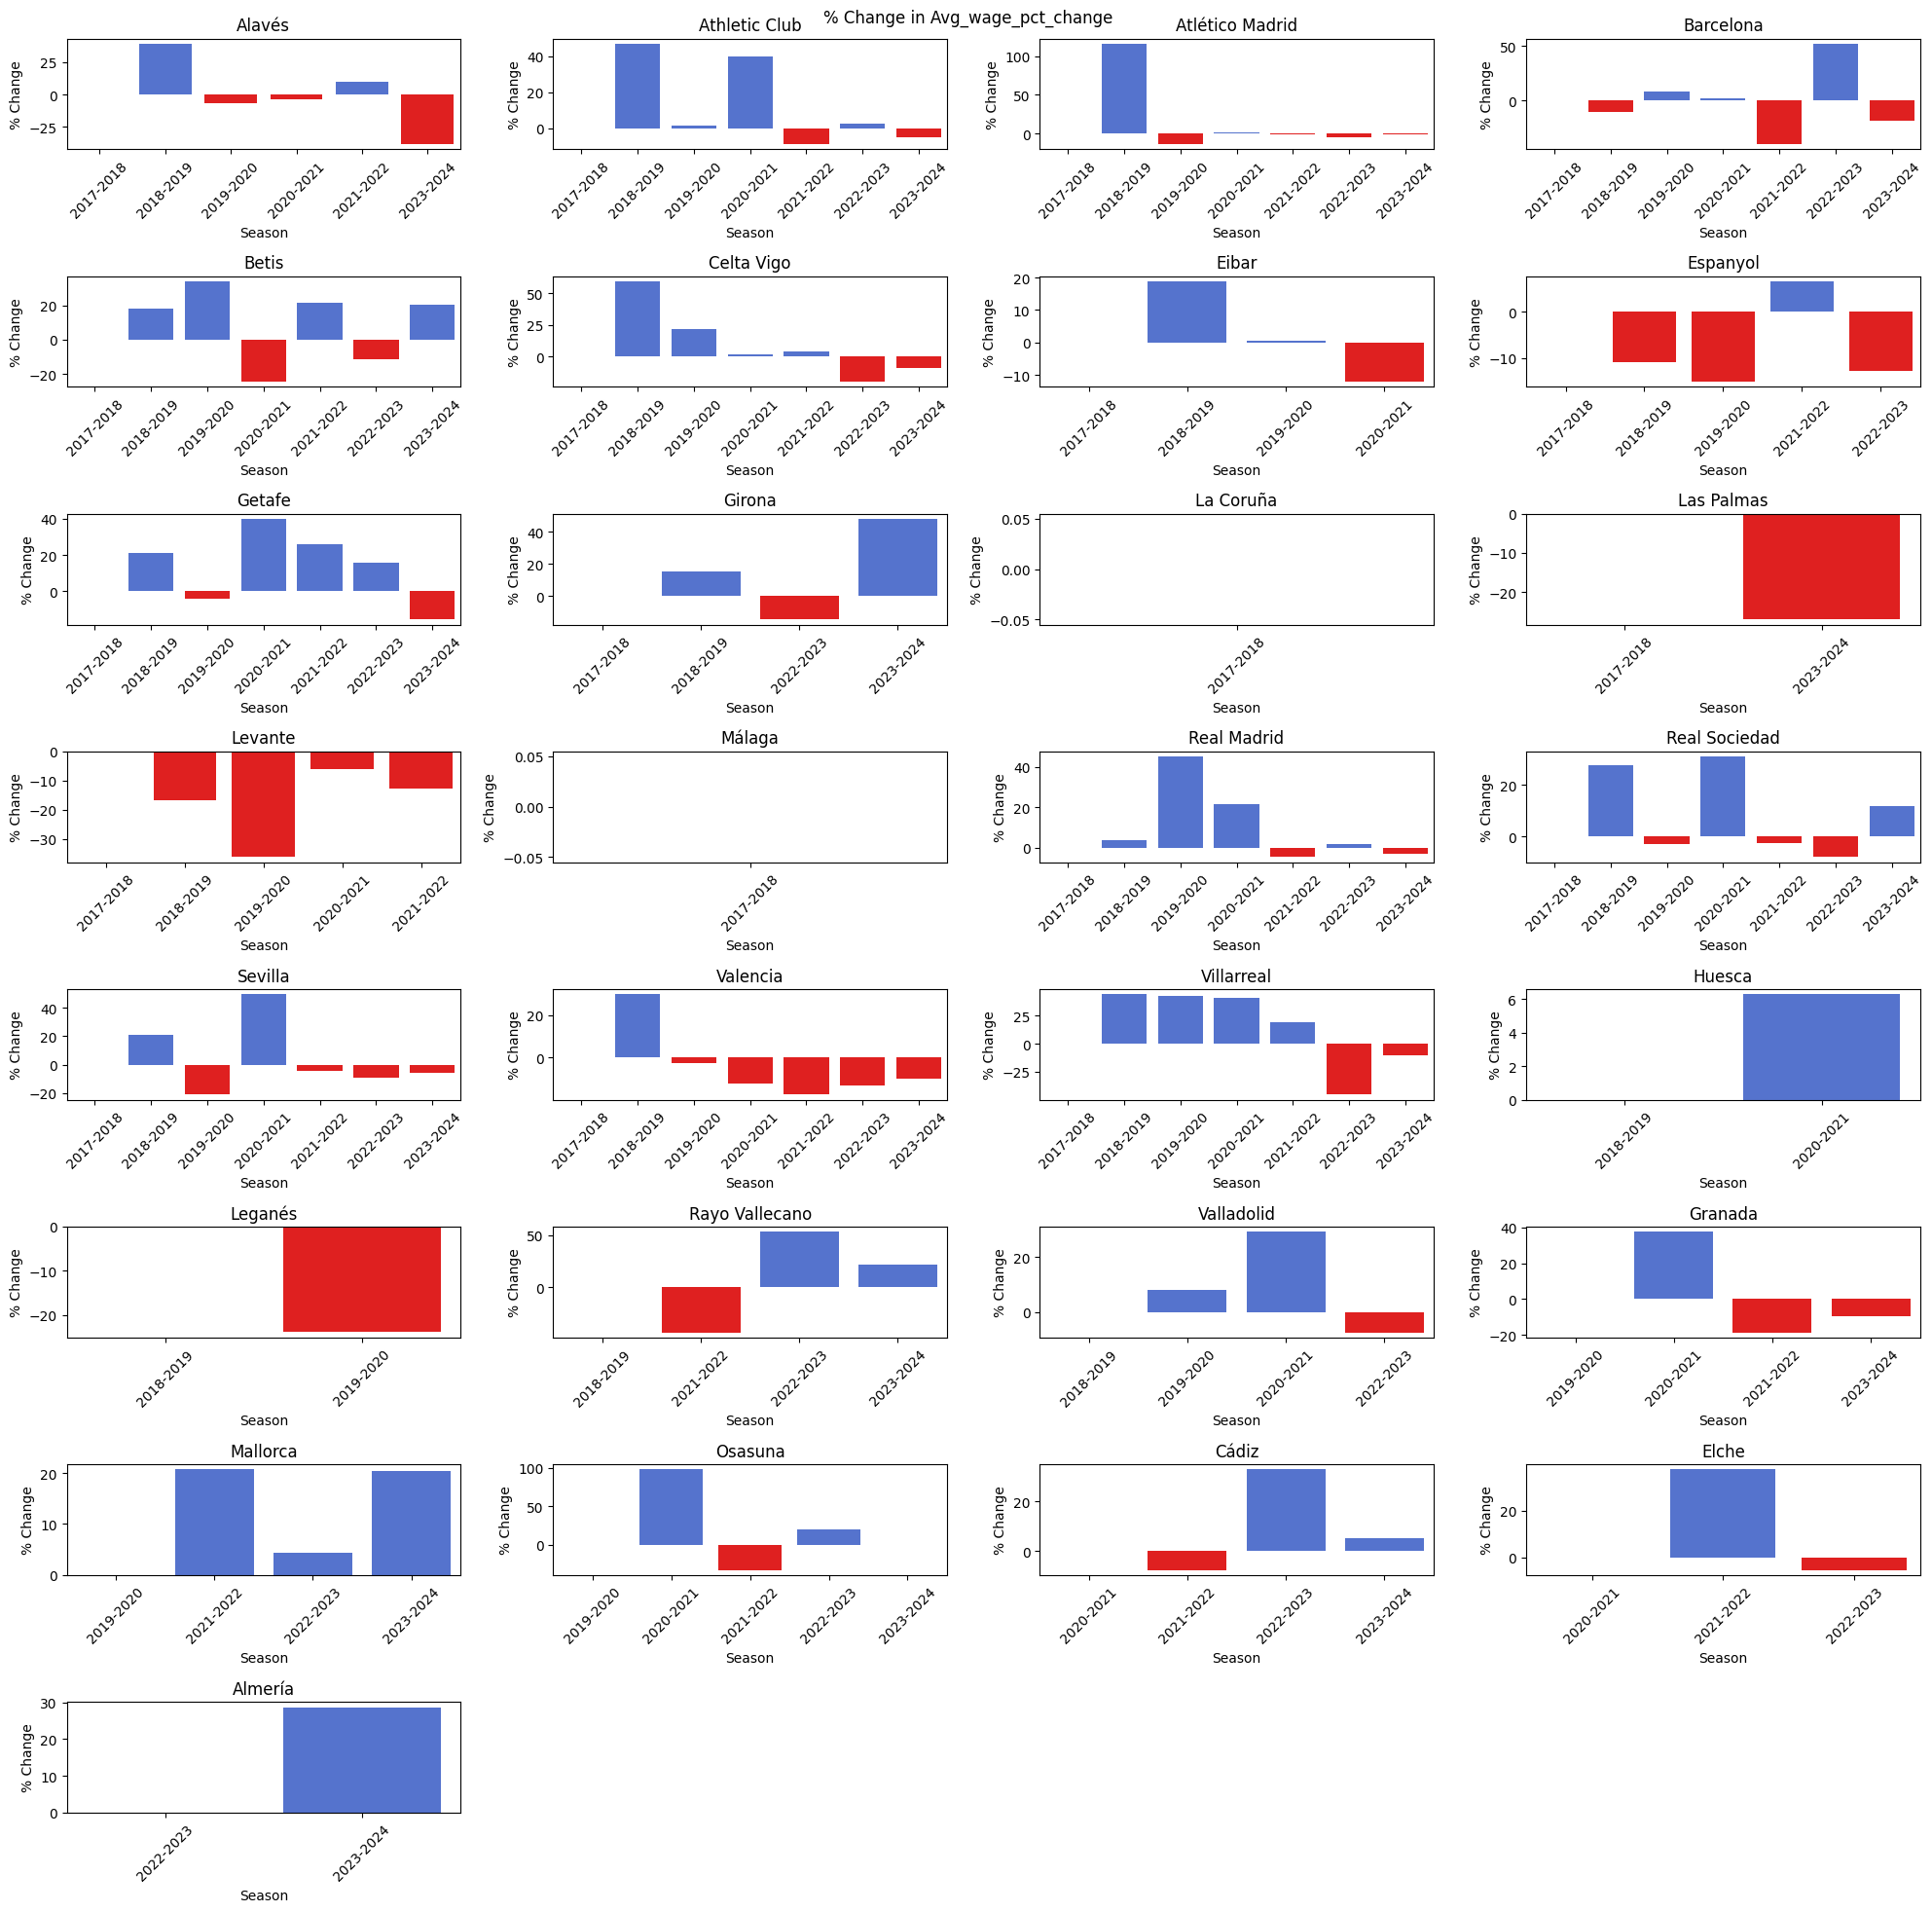

In [20]:
wage_plots.pct_change_plots('avg_wage_pct_change')

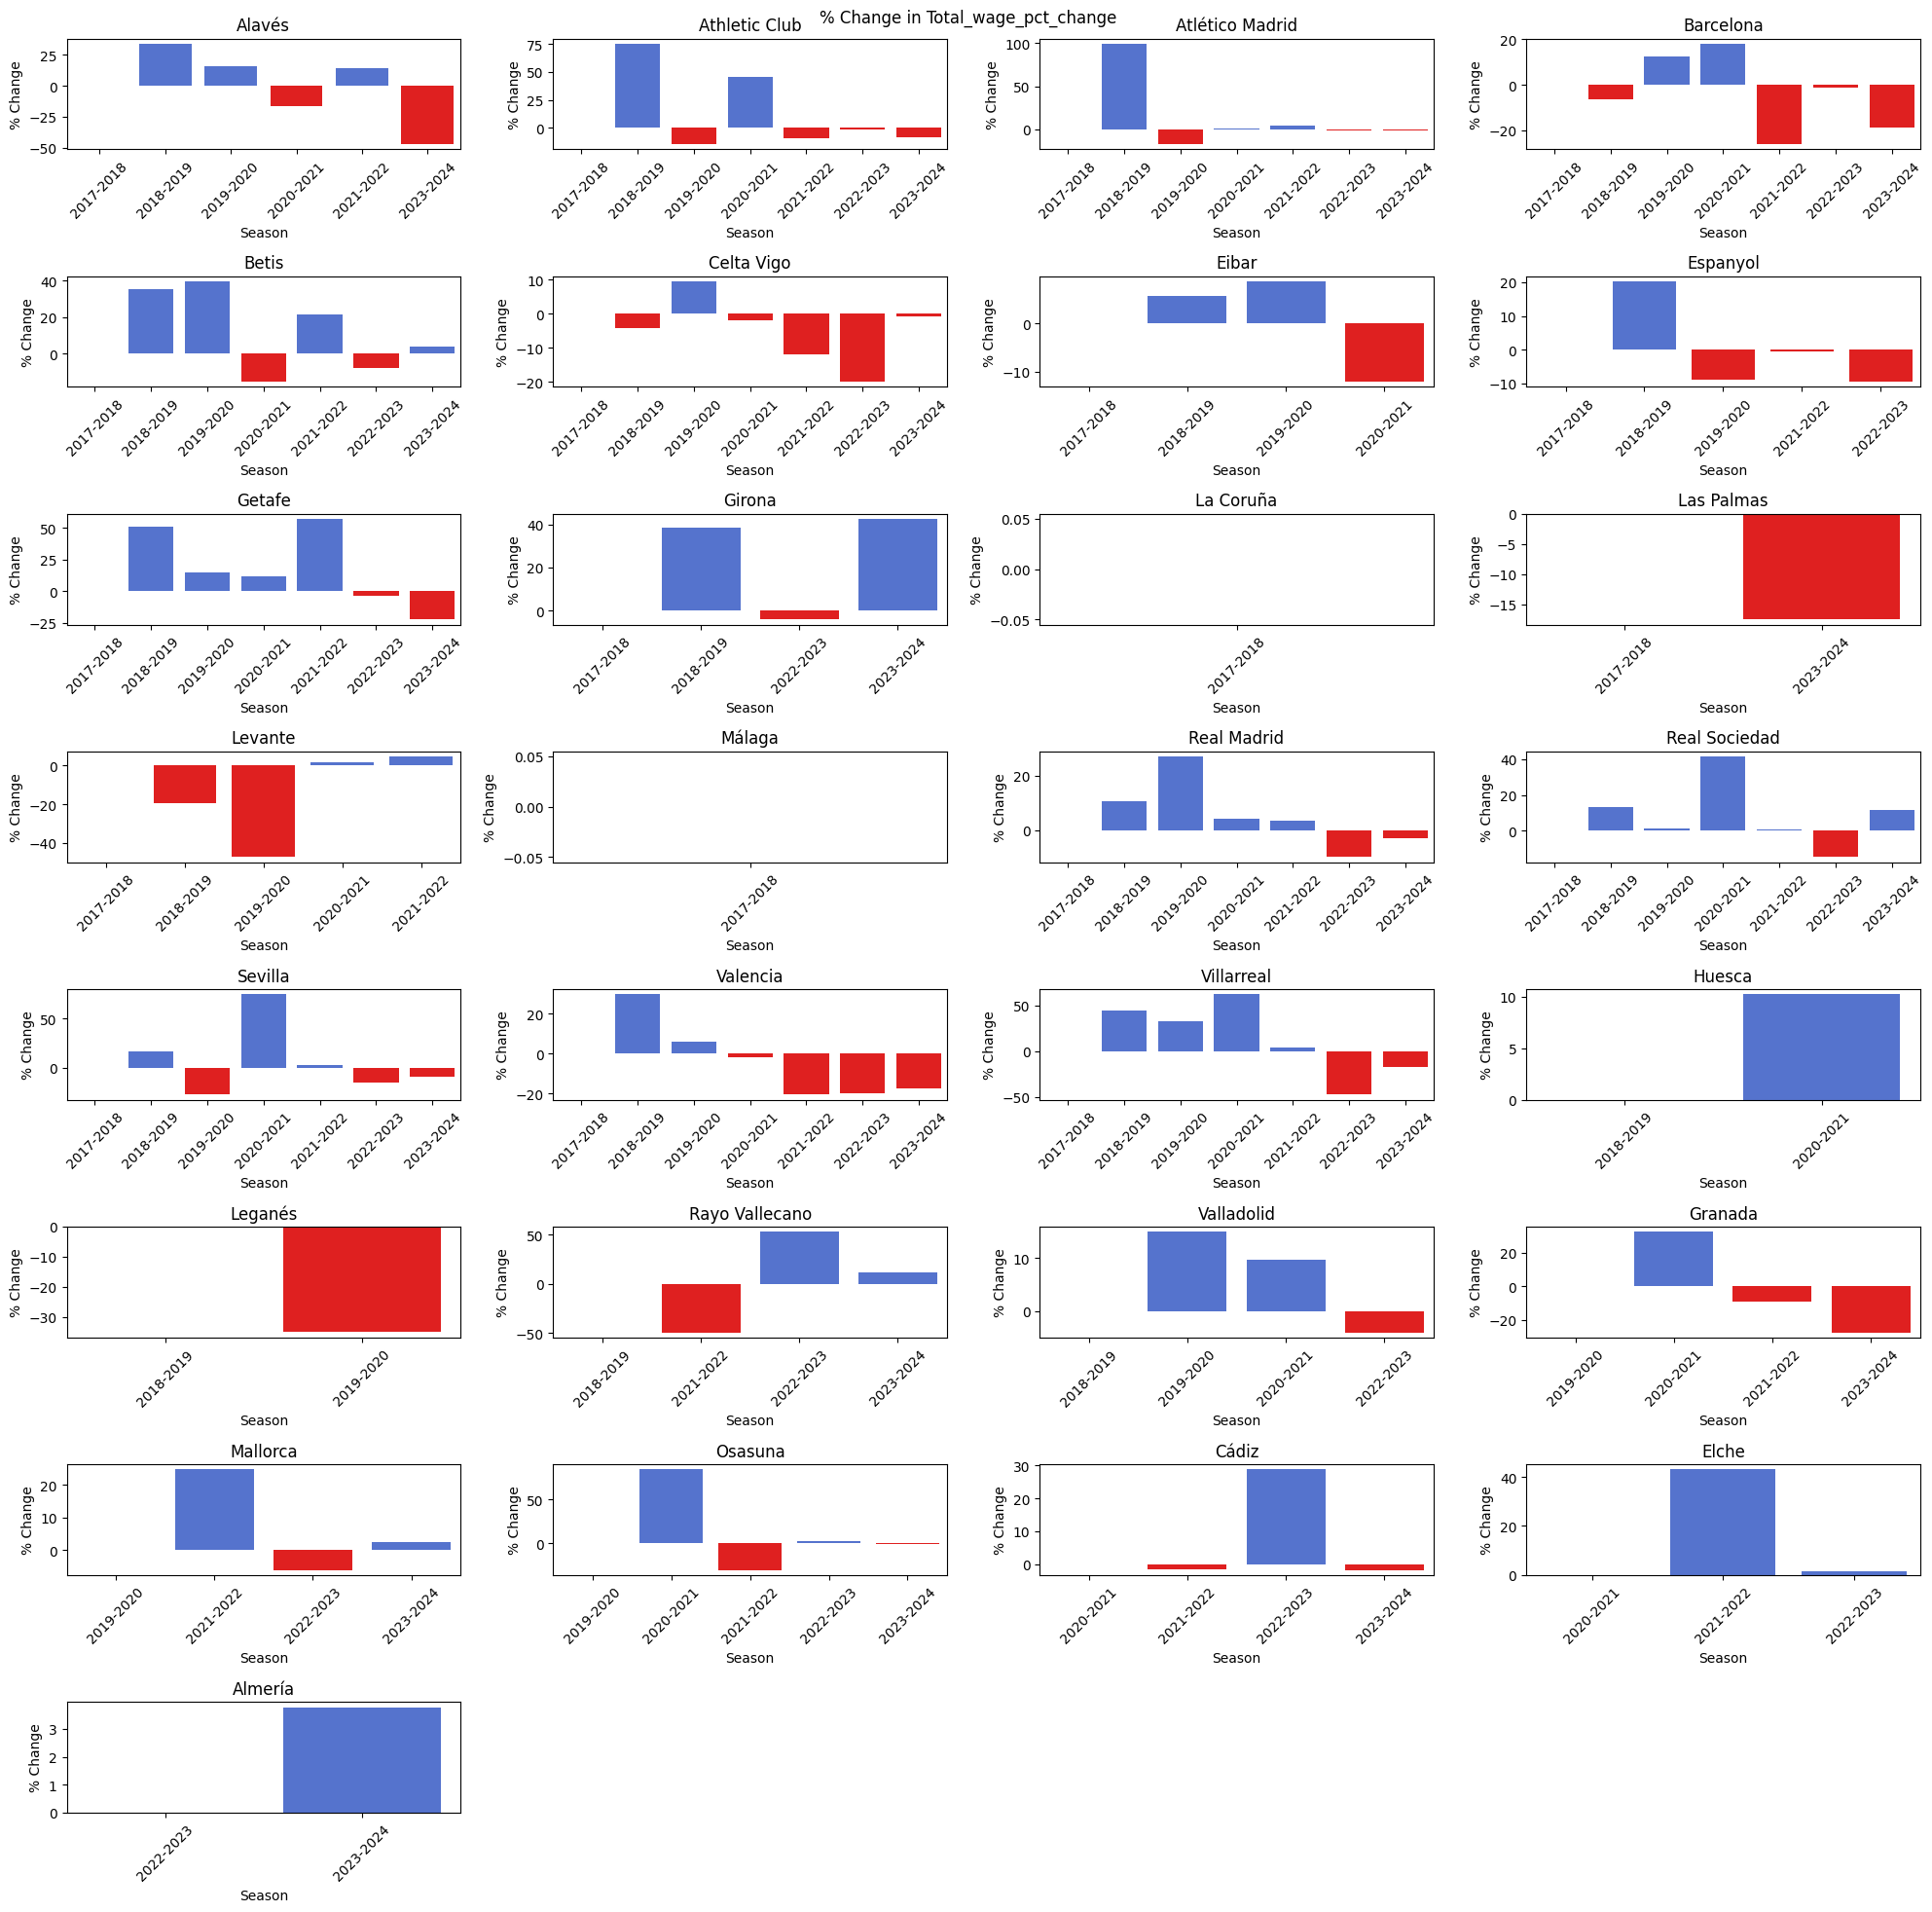

In [22]:
wage_plots.pct_change_plots('total_wage_pct_change')